<a href="https://colab.research.google.com/github/paruliansaragi/Face/blob/master/Arcface_DeepInsight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Procedure

In [0]:
!git clone https://github.com/deepinsight/insightface.git

Cloning into 'insightface'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 2634 (delta 2), reused 2 (delta 0), pack-reused 2625
Receiving objects: 100% (2634/2634), 18.62 MiB | 7.76 MiB/s, done.
Resolving deltas: 100% (1635/1635), done.


In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!pip install mxnet-cu100

     |████████████████████████████████| 488.3MB 33kB/s 
     |████████████████████████████████| 13.8MB 1.4MB/s 
ERROR: spacy 2.1.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: imgaug 0.2.9 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: fastai 1.0.54 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: blis 0.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.16.4
    Uninstalling numpy-1.16.4:
      Successfully uninstalled numpy-1.16.4
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
%cd ./insightface/models
!unzip ../../model-r100-arcface-ms1m-refine-v2.zip
%cd ../../

/content/insightface/models
Archive:  ../../model-r100-arcface-ms1m-refine-v2.zip
warning [../../model-r100-arcface-ms1m-refine-v2.zip]:  240349162 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  240349162
  (attempting to re-compensate)
   creating: model-r100-ii/
  inflating: model-r100-ii/log       
  inflating: model-r100-ii/model-0000.params  
  error:  invalid compressed data to inflate
file #4:  bad zipfile offset (local header sig):  243481016
  (attempting to re-compensate)
  inflating: model-r100-ii/model-symbol.json  
/content


In [0]:
!wget https://www.dropbox.com/s/wpx6tqjf0y5mf6r/faces_ms1m-refine-v2_112x112.zip

--2019-07-03 07:54:16--  https://www.dropbox.com/s/wpx6tqjf0y5mf6r/faces_ms1m-refine-v2_112x112.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wpx6tqjf0y5mf6r/faces_ms1m-refine-v2_112x112.zip [following]
--2019-07-03 07:54:17--  https://www.dropbox.com/s/raw/wpx6tqjf0y5mf6r/faces_ms1m-refine-v2_112x112.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc12e846389d5cbf9c2d696c11c4.dl.dropboxusercontent.com/cd/0/inline/Aj_nul4NHrRw_Sr9d5gZcx-CE7ohcLlK6XzzZa4qB9BPu4hBsfnvJwzADBh7ZFWuDGdX3FEtco3q9eYNHDabPW05UBQxjbTYIosXSFJiiJnX2Q/file# [following]
--2019-07-03 07:54:17--  https://uc12e846389d5cbf9c2d696c11c4.dl.dropboxusercontent.com/cd/0/inline/Aj_nul4NHrRw_Sr9d5gZcx-CE7ohcLlK6XzzZa4qB9BPu4hBsfnvJwzADBh7ZFWuDGdX3FEt

In [0]:
!unzip ./faces_ms1m-refine-v2_112x112.zip

Archive:  ./faces_ms1m-refine-v2_112x112.zip
   creating: faces_emore/
  inflating: faces_emore/property    
  inflating: faces_emore/vgg2_fp.bin  
  inflating: faces_emore/calfw.bin   
  inflating: faces_emore/train.rec   
  inflating: faces_emore/cplfw.bin   
  inflating: faces_emore/agedb_30.bin  
  inflating: faces_emore/train.idx   
  inflating: faces_emore/cfp_fp.bin  
  inflating: faces_emore/cfp_ff.bin  
  inflating: faces_emore/lfw.bin     


In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mv ./model-r100-arcface-ms1m-refine-v2.zip "./drive/My Drive/"

In [0]:
!unzip "./drive/My Drive/model-r100-arcface-ms1m-refine-v2.zip"

Archive:  ./drive/My Drive/model-r100-arcface-ms1m-refine-v2.zip
   creating: model-r100-ii/
  inflating: model-r100-ii/log       
  inflating: model-r100-ii/model-0000.params  
  inflating: model-r100-ii/model-symbol.json  


In [0]:
%cd insightface

/content/insightface


In [0]:
!mv ../faces_emore ./datasets

In [0]:
%cd src/eval

/content/insightface/src/eval


In [0]:
#!ls ../../datasets/faces_emore
!ls ../../models/model-r100-ii/

log  model-0000.params	model-symbol.json


In [0]:
%cd ../../models

/content/insightface/models


In [0]:
!unzip "../../drive/My Drive/model-r50-arcface-ms1m-refine-v1.zip"

Archive:  ../../drive/My Drive/model-r50-arcface-ms1m-refine-v1.zip
   creating: model-r50-am-lfw/
  inflating: model-r50-am-lfw/log    
  inflating: model-r50-am-lfw/model-0000.params  
  inflating: model-r50-am-lfw/model-symbol.json  


In [0]:
%cd ../src/eval

/content/insightface/src/eval


In [0]:
!ls ../../datasets/faces_emore/

agedb_30.bin  cfp_ff.bin  cplfw.bin  property	train.rec
calfw.bin     cfp_fp.bin  lfw.bin    train.idx	vgg2_fp.bin


In [0]:
!python verification.py --data-dir ../../datasets/faces_emore/ --model ../../models/model-r50-am-lfw/model,0 --batch-size 1 --nfolds 1

image_size [112, 112]
model number 1
loading ../../models/model-r50-am-lfw/model 0
[09:18:22] src/nnvm/legacy_json_util.cc:209: Loading symbol saved by previous version v0.12.1. Attempting to upgrade...
[09:18:22] src/nnvm/legacy_json_util.cc:217: Symbol successfully upgraded!
model loading time 2.298717
loading..  lfw
Traceback (most recent call last):
  File "verification.py", line 569, in <module>
    data_set = load_bin(path, image_size)
  File "verification.py", line 185, in load_bin
    bins, issame_list = pickle.load(open(path, 'rb'))
UnicodeDecodeError: 'ascii' codec can't decode byte 0xff in position 0: ordinal not in range(128)


# Begin

In [0]:
#@title imports 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import argparse
import sys
import numpy as np
from scipy import misc
from sklearn.model_selection import KFold
from scipy import interpolate
import sklearn
import cv2
import math
import datetime
import pickle
from sklearn.decomposition import PCA
import mxnet as mx
from mxnet import ndarray as nd
#sys.path.append(os.path.join(os.path.dirname(__file__), '..', 'common'))
sys.path.append('../common')
import face_image


In [0]:
#@title calculate_roc 
def calculate_roc(thresholds, embeddings1, embeddings2, actual_issame, nrof_folds=10, pca = 0):
    assert(embeddings1.shape[0] == embeddings2.shape[0])
    assert(embeddings1.shape[1] == embeddings2.shape[1])
    nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
    nrof_thresholds = len(thresholds)
    k_fold = LFold(n_splits=nrof_folds, shuffle=False)
    
    tprs = np.zeros((nrof_folds,nrof_thresholds))
    fprs = np.zeros((nrof_folds,nrof_thresholds))
    accuracy = np.zeros((nrof_folds))
    indices = np.arange(nrof_pairs)
    #print('pca', pca)
    
    if pca==0:
      diff = np.subtract(embeddings1, embeddings2)
      dist = np.sum(np.square(diff),1)
    
    for fold_idx, (train_set, test_set) in enumerate(k_fold.split(indices)):
        #print('train_set', train_set)
        #print('test_set', test_set)
        if pca>0:
          print('doing pca on', fold_idx)
          embed1_train = embeddings1[train_set]
          embed2_train = embeddings2[train_set]
          _embed_train = np.concatenate( (embed1_train, embed2_train), axis=0 )
          #print(_embed_train.shape)
          pca_model = PCA(n_components=pca)
          pca_model.fit(_embed_train)
          embed1 = pca_model.transform(embeddings1)
          embed2 = pca_model.transform(embeddings2)
          embed1 = sklearn.preprocessing.normalize(embed1)
          embed2 = sklearn.preprocessing.normalize(embed2)
          #print(embed1.shape, embed2.shape)
          diff = np.subtract(embed1, embed2)
          dist = np.sum(np.square(diff),1)
        
        # Find the best threshold for the fold
        
        #My changes
        #tpr, fpr = np.zeros((nrof_thresholds)), np.zeros((nrof_thresholds))
        
        acc_train = np.zeros((nrof_thresholds))
        for threshold_idx, threshold in enumerate(thresholds):
            _, _, acc_train[threshold_idx] = calculate_accuracy(threshold, dist[train_set], actual_issame[train_set])
            #tpr, fpr, acc_train[threshold_idx] = calculate_accuracy(threshold, dist[train_set], actual_issame[train_set])
        best_threshold_index = np.argmax(acc_train)
        #print('threshold', thresholds[best_threshold_index])
        for threshold_idx, threshold in enumerate(thresholds):
            tprs[fold_idx,threshold_idx], fprs[fold_idx,threshold_idx], _ = calculate_accuracy(threshold, dist[test_set], actual_issame[test_set])
        _, _, accuracy[fold_idx] = calculate_accuracy(thresholds[best_threshold_index], dist[test_set], actual_issame[test_set])
          
    tpr = np.mean(tprs,0)
    fpr = np.mean(fprs,0)
    
    
    
    return tpr, fpr, accuracy


In [0]:
#@title LFold
class LFold:
  def __init__(self, n_splits = 2, shuffle = False):
    self.n_splits = n_splits
    if self.n_splits>1:
      self.k_fold = KFold(n_splits = n_splits, shuffle = shuffle)

  def split(self, indices):
    if self.n_splits>1:
      return self.k_fold.split(indices)
    else:
      return [(indices, indices)]

In [0]:
#@title Evaluate & load bin
def evaluate(embeddings, actual_issame, nrof_folds=10, pca = 0):
    # Calculate evaluation metrics
    thresholds = np.arange(0, 4, 0.01)
    embeddings1 = embeddings[0::2]
    embeddings2 = embeddings[1::2]
    tpr, fpr, accuracy = calculate_roc(thresholds, embeddings1, embeddings2,
        np.asarray(actual_issame), nrof_folds=nrof_folds, pca = pca)
    thresholds = np.arange(0, 4, 0.001)
    val, val_std, far = calculate_val(thresholds, embeddings1, embeddings2,
        np.asarray(actual_issame), 1e-3, nrof_folds=nrof_folds)
    return tpr, fpr, accuracy, val, val_std, far

def load_bin(path, image_size):
  bins, issame_list = pickle.load(open(path, 'rb'), encoding='bytes')
  data_list = []
  for flip in [0,1]:
    data = nd.empty((len(issame_list)*2, 3, image_size[0], image_size[1]))
    data_list.append(data)
  for i in range(len(issame_list)*2):
    _bin = bins[i]
    img = mx.image.imdecode(_bin)
    if img.shape[1]!=image_size[0]:
      img = mx.image.resize_short(img, image_size[0])
    img = nd.transpose(img, axes=(2, 0, 1))
    for flip in [0,1]:
      if flip==1:
        img = mx.ndarray.flip(data=img, axis=2)
      data_list[flip][i][:] = img
    if i%1000==0:
      print('loading bin', i)
  print(data_list[0].shape)
  return (data_list, issame_list)

In [0]:
class Counter():
  def __init__(self):
    self.thresholds = np.arange(0, 4, 0.01)
    self.nrof_folds = 10
    self.nrof_thresholds = len(self.thresholds)
    self.tpc = np.zeros((self.nrof_folds, self.nrof_thresholds))
    self.fpc = np.zeros((self.nrof_folds,self.nrof_thresholds))
    self.tnc = np.zeros((self.nrof_folds,self.nrof_thresholds))
    self.fnc = np.zeros((self.nrof_folds,self.nrof_thresholds))    

In [0]:
ts_fs_counter = Counter()

In [0]:
ts_fs_counter.tnc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
#@title calculate accuracy/val/val_far
def calculate_accuracy(threshold, dist, actual_issame):
    predict_issame = np.less(dist, threshold)
    tp = np.sum(np.logical_and(predict_issame, actual_issame))
    fp = np.sum(np.logical_and(predict_issame, np.logical_not(actual_issame)))
    tn = np.sum(np.logical_and(np.logical_not(predict_issame), np.logical_not(actual_issame)))
    fn = np.sum(np.logical_and(np.logical_not(predict_issame), actual_issame))
    #
    ts_fs_counter.tpc = tp
    ts_fs_counter.fpc = fp
    ts_fs_counter.tnc = tn
    ts_fs_counter.fnc = fn
    #
  
    tpr = 0 if (tp+fn==0) else float(tp) / float(tp+fn)
    fpr = 0 if (fp+tn==0) else float(fp) / float(fp+tn)
    acc = float(tp+tn)/dist.size
    return tpr, fpr, acc, tp, fp, tn, fn
    #return tpr, fpr, acc


  
def calculate_val(thresholds, embeddings1, embeddings2, actual_issame, far_target, nrof_folds=10):
    assert(embeddings1.shape[0] == embeddings2.shape[0])
    assert(embeddings1.shape[1] == embeddings2.shape[1])
    nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
    nrof_thresholds = len(thresholds)
    k_fold = LFold(n_splits=nrof_folds, shuffle=False)
    
    val = np.zeros(nrof_folds)
    far = np.zeros(nrof_folds)
    
    diff = np.subtract(embeddings1, embeddings2)
    dist = np.sum(np.square(diff),1)
    indices = np.arange(nrof_pairs)
    
    for fold_idx, (train_set, test_set) in enumerate(k_fold.split(indices)):
      
        # Find the threshold that gives FAR = far_target
        far_train = np.zeros(nrof_thresholds)
        for threshold_idx, threshold in enumerate(thresholds):
            _, far_train[threshold_idx] = calculate_val_far(threshold, dist[train_set], actual_issame[train_set])
        if np.max(far_train)>=far_target:
            f = interpolate.interp1d(far_train, thresholds, kind='slinear')
            threshold = f(far_target)
        else:
            threshold = 0.0
    
        val[fold_idx], far[fold_idx] = calculate_val_far(threshold, dist[test_set], actual_issame[test_set])
  
    val_mean = np.mean(val)
    far_mean = np.mean(far)
    val_std = np.std(val)
    return val_mean, val_std, far_mean


def calculate_val_far(threshold, dist, actual_issame):
    predict_issame = np.less(dist, threshold)
    true_accept = np.sum(np.logical_and(predict_issame, actual_issame))
    false_accept = np.sum(np.logical_and(predict_issame, np.logical_not(actual_issame)))
    n_same = np.sum(actual_issame)
    n_diff = np.sum(np.logical_not(actual_issame))
    #print(true_accept, false_accept)
    #print(n_same, n_diff)
    val = float(true_accept) / float(n_same)
    far = float(false_accept) / float(n_diff)
    return val, far


In [0]:
#@title modified test badcase { form-width: "45px" }

def mod_test_badcase(data_set, mx_model, batch_size, name='', data_extra = None, label_shape = None):
  print('testing verification badcase..')
  data_list = data_set[0]
  issame_list = data_set[1]
  model = mx_model
  embeddings_list = []
  if data_extra is not None:
    _data_extra = nd.array(data_extra)
  time_consumed = 0.0
  if label_shape is None:
    _label = nd.ones( (batch_size,) )
  else:
    _label = nd.ones( label_shape )
  for i in range( len(data_list) ):
    data = data_list[i]
    embeddings = None
    ba = 0
    while ba<data.shape[0]:
      bb = min(ba+batch_size, data.shape[0])
      count = bb-ba
      _data = nd.slice_axis(data, axis=0, begin=bb-batch_size, end=bb)
      #print(_data.shape, _label.shape)
      time0 = datetime.datetime.now()
      if data_extra is None:
        db = mx.io.DataBatch(data=(_data,), label=(_label,))
      else:
        db = mx.io.DataBatch(data=(_data,_data_extra), label=(_label,))
      model.forward(db, is_train=False)
      net_out = model.get_outputs()
      _embeddings = net_out[0].asnumpy()
      time_now = datetime.datetime.now()
      diff = time_now - time0
      time_consumed+=diff.total_seconds()
      if embeddings is None:
        embeddings = np.zeros( (data.shape[0], _embeddings.shape[1]) )
      embeddings[ba:bb,:] = _embeddings[(batch_size-count):,:]
      ba = bb
    embeddings_list.append(embeddings)
  embeddings = embeddings_list[0] + embeddings_list[1]
  embeddings = sklearn.preprocessing.normalize(embeddings)
  thresholds = np.arange(0, 4, 0.01)
  actual_issame = np.asarray(issame_list)
  nrof_folds = 10
  embeddings1 = embeddings[0::2]
  embeddings2 = embeddings[1::2]
  assert(embeddings1.shape[0] == embeddings2.shape[0])
  assert(embeddings1.shape[1] == embeddings2.shape[1])
  nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
  nrof_thresholds = len(thresholds)
  k_fold = LFold(n_splits=nrof_folds, shuffle=False)
  
  tprs = np.zeros((nrof_folds,nrof_thresholds))
  fprs = np.zeros((nrof_folds,nrof_thresholds))
  
  #
  tp, fp, tn, fn = np.zeros((nrof_folds,nrof_thresholds)), np.zeros((nrof_folds,nrof_thresholds)), np.zeros((nrof_folds,nrof_thresholds)), np.zeros((nrof_folds,nrof_thresholds))
  #
  
  accuracy = np.zeros((nrof_folds))
  indices = np.arange(nrof_pairs)
  
  diff = np.subtract(embeddings1, embeddings2)
  dist = np.sum(np.square(diff),1)
  data = data_list[0]

  pouts = []
  nouts = []
  
  for fold_idx, (train_set, test_set) in enumerate(k_fold.split(indices)):
       
      # Find the best threshold for the fold
      acc_train = np.zeros((nrof_thresholds))
      #print(train_set)
      #print(train_set.__class__)
      for threshold_idx, threshold in enumerate(thresholds):
          p2 = dist[train_set]
          p3 = actual_issame[train_set]
          _, _, acc_train[threshold_idx], _, _, _, _ = calculate_accuracy(threshold, p2, p3)
      best_threshold_index = np.argmax(acc_train)
      for threshold_idx, threshold in enumerate(thresholds):
          tprs[fold_idx,threshold_idx], fprs[fold_idx,threshold_idx], _, tp[fold_idx,threshold_idx], fp[fold_idx,threshold_idx], tn[fold_idx,threshold_idx], fn[fold_idx,threshold_idx] = \
          calculate_accuracy(threshold, dist[test_set], actual_issame[test_set])
      _, _, accuracy[fold_idx], _, _, _, _ = calculate_accuracy(thresholds[best_threshold_index], dist[test_set], actual_issame[test_set])
      best_threshold = thresholds[best_threshold_index]
      for iid in test_set:
        ida = iid*2
        idb = ida+1
        asame = actual_issame[iid]
        _dist = dist[iid]
        violate = _dist - best_threshold
        if not asame:
          violate *= -1.0
        if violate>0.0:
          imga = data[ida].asnumpy().transpose( (1,2,0) )[...,::-1] #to bgr
          imgb = data[idb].asnumpy().transpose( (1,2,0) )[...,::-1]
          #print(imga.shape, imgb.shape, violate, asame, _dist)
          if asame:
            pouts.append( (imga, imgb, _dist, best_threshold, ida) )
          else:
            nouts.append( (imga, imgb, _dist, best_threshold, ida) )

        
  tpr = np.mean(tprs,0)
  fpr = np.mean(fprs,0)
  acc = np.mean(accuracy)
  pouts = sorted(pouts, key = lambda x: x[2], reverse=True)
  nouts = sorted(nouts, key = lambda x: x[2], reverse=False)
  print(len(pouts), len(nouts))
  print('acc', acc)
  #print('Tpr', tpr)
  #print('Fpr', fpr)
  gap = 10
  image_shape = (112,224,3)
  out_dir = "./badcases"
  if not os.path.exists(out_dir):
    os.makedirs(out_dir)
  if len(nouts)>0:
    threshold = nouts[0][3]
  else:
    threshold = pouts[-1][3]
  
  for item in [(pouts, 'positive(false_negative).png'), (nouts, 'negative(false_positive).png')]:
    cols = 4
    rows = 8000
    outs = item[0]
    if len(outs)==0:
      continue
    #if len(outs)==9:
    #  cols = 3
    #  rows = 3

    _rows = int(math.ceil(len(outs)/cols))
    rows = min(rows, _rows)
    hack = {}

    if name.startswith('cfp') and item[1].startswith('pos'):
      hack = {0:'manual/238_13.jpg.jpg', 6:'manual/088_14.jpg.jpg', 10:'manual/470_14.jpg.jpg', 25:'manual/238_13.jpg.jpg', 28:'manual/143_11.jpg.jpg'}

    filename = item[1]
    if len(name)>0:
      filename = name+"_"+filename
    filename = os.path.join(out_dir, filename)
    img = np.zeros( (image_shape[0]*rows+20, image_shape[1]*cols+(cols-1)*gap, 3), dtype=np.uint8 )
    img[:,:,:] = 255
    text_color = (0,0,153)
    text_color = (255,178,102)
    text_color = (153,255,51)
    for outi, out in enumerate(outs):
      row = outi//cols
      col = outi%cols
      if row==rows:
        break
      imga = out[0].copy()
      imgb = out[1].copy()
      if outi in hack:
        idx = out[4]
        print('noise idx',idx)
        aa = hack[outi]
        imgb = cv2.imread(aa)
        #if aa==1:
        #  imgb = cv2.transpose(imgb)
        #  imgb = cv2.flip(imgb, 1)
        #elif aa==3:
        #  imgb = cv2.transpose(imgb)
        #  imgb = cv2.flip(imgb, 0)
        #else:
        #  for ii in range(2):
        #    imgb = cv2.transpose(imgb)
        #    imgb = cv2.flip(imgb, 1)
      dist = out[2]
      _img = np.concatenate( (imga, imgb), axis=1 )
      k = "%.3f"%dist
      #print(k)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(_img,k,(80,image_shape[0]//2+7), font, 0.6, text_color, 2)
      #_filename = filename+"_%d.png"%outi
      #cv2.imwrite(_filename, _img)
      img[row*image_shape[0]:(row+1)*image_shape[0], (col*image_shape[1]+gap*col):((col+1)*image_shape[1]+gap*col),:] = _img
    #threshold = outs[0][3]
    font = cv2.FONT_HERSHEY_SIMPLEX
    k = "threshold: %.3f"%threshold
    cv2.putText(img,k,(img.shape[1]//2-70,img.shape[0]-5), font, 0.6, text_color, 2)
    cv2.imwrite(filename, img)
  return tp, fp, tn, fn




In [0]:
#@title test badcase { form-width: "45px" }

def test_badcase(data_set, mx_model, batch_size, name='', data_extra = None, label_shape = None):
  print('testing verification badcase..')
  data_list = data_set[0]
  issame_list = data_set[1]
  model = mx_model
  embeddings_list = []
  if data_extra is not None:
    _data_extra = nd.array(data_extra)
  time_consumed = 0.0
  if label_shape is None:
    _label = nd.ones( (batch_size,) )
  else:
    _label = nd.ones( label_shape )
  for i in range( len(data_list) ):
    data = data_list[i]
    embeddings = None
    ba = 0
    while ba<data.shape[0]:
      bb = min(ba+batch_size, data.shape[0])
      count = bb-ba
      _data = nd.slice_axis(data, axis=0, begin=bb-batch_size, end=bb)
      #print(_data.shape, _label.shape)
      time0 = datetime.datetime.now()
      if data_extra is None:
        db = mx.io.DataBatch(data=(_data,), label=(_label,))
      else:
        db = mx.io.DataBatch(data=(_data,_data_extra), label=(_label,))
      model.forward(db, is_train=False)
      net_out = model.get_outputs()
      _embeddings = net_out[0].asnumpy()
      time_now = datetime.datetime.now()
      diff = time_now - time0
      time_consumed+=diff.total_seconds()
      if embeddings is None:
        embeddings = np.zeros( (data.shape[0], _embeddings.shape[1]) )
      embeddings[ba:bb,:] = _embeddings[(batch_size-count):,:]
      ba = bb
    embeddings_list.append(embeddings)
  embeddings = embeddings_list[0] + embeddings_list[1]
  embeddings = sklearn.preprocessing.normalize(embeddings)
  thresholds = np.arange(0, 4, 0.01)
  actual_issame = np.asarray(issame_list)
  nrof_folds = 10
  embeddings1 = embeddings[0::2]
  embeddings2 = embeddings[1::2]
  assert(embeddings1.shape[0] == embeddings2.shape[0])
  assert(embeddings1.shape[1] == embeddings2.shape[1])
  nrof_pairs = min(len(actual_issame), embeddings1.shape[0])
  nrof_thresholds = len(thresholds)
  k_fold = LFold(n_splits=nrof_folds, shuffle=False)
  
  tprs = np.zeros((nrof_folds,nrof_thresholds))
  fprs = np.zeros((nrof_folds,nrof_thresholds))
  accuracy = np.zeros((nrof_folds))
  indices = np.arange(nrof_pairs)
  
  diff = np.subtract(embeddings1, embeddings2)
  dist = np.sum(np.square(diff),1)
  data = data_list[0]

  pouts = []
  nouts = []
  
  for fold_idx, (train_set, test_set) in enumerate(k_fold.split(indices)):
       
      # Find the best threshold for the fold
      acc_train = np.zeros((nrof_thresholds))
      #print(train_set)
      #print(train_set.__class__)
      for threshold_idx, threshold in enumerate(thresholds):
          p2 = dist[train_set]
          p3 = actual_issame[train_set]
          _, _, acc_train[threshold_idx] = calculate_accuracy(threshold, p2, p3)
      best_threshold_index = np.argmax(acc_train)
      for threshold_idx, threshold in enumerate(thresholds):
          tprs[fold_idx,threshold_idx], fprs[fold_idx,threshold_idx], _ = calculate_accuracy(threshold, dist[test_set], actual_issame[test_set])
      _, _, accuracy[fold_idx] = calculate_accuracy(thresholds[best_threshold_index], dist[test_set], actual_issame[test_set])
      best_threshold = thresholds[best_threshold_index]
      for iid in test_set:
        ida = iid*2
        idb = ida+1
        asame = actual_issame[iid]
        _dist = dist[iid]
        violate = _dist - best_threshold
        if not asame:
          violate *= -1.0
        if violate>0.0:
          imga = data[ida].asnumpy().transpose( (1,2,0) )[...,::-1] #to bgr
          imgb = data[idb].asnumpy().transpose( (1,2,0) )[...,::-1]
          #print(imga.shape, imgb.shape, violate, asame, _dist)
          if asame:
            pouts.append( (imga, imgb, _dist, best_threshold, ida) )
          else:
            nouts.append( (imga, imgb, _dist, best_threshold, ida) )

        
  tpr = np.mean(tprs,0)
  fpr = np.mean(fprs,0)
  acc = np.mean(accuracy)
  pouts = sorted(pouts, key = lambda x: x[2], reverse=True)
  nouts = sorted(nouts, key = lambda x: x[2], reverse=False)
  print(len(pouts), len(nouts))
  print('acc', acc)
  gap = 10
  image_shape = (112,224,3)
  out_dir = "./badcases"
  if not os.path.exists(out_dir):
    os.makedirs(out_dir)
  if len(nouts)>0:
    threshold = nouts[0][3]
  else:
    threshold = pouts[-1][3]
  
  for item in [(pouts, 'positive(false_negative).png'), (nouts, 'negative(false_positive).png')]:
    cols = 4
    rows = 8000
    outs = item[0]
    if len(outs)==0:
      continue
    #if len(outs)==9:
    #  cols = 3
    #  rows = 3

    _rows = int(math.ceil(len(outs)/cols))
    rows = min(rows, _rows)
    hack = {}

    if name.startswith('cfp') and item[1].startswith('pos'):
      hack = {0:'manual/238_13.jpg.jpg', 6:'manual/088_14.jpg.jpg', 10:'manual/470_14.jpg.jpg', 25:'manual/238_13.jpg.jpg', 28:'manual/143_11.jpg.jpg'}

    filename = item[1]
    if len(name)>0:
      filename = name+"_"+filename
    filename = os.path.join(out_dir, filename)
    img = np.zeros( (image_shape[0]*rows+20, image_shape[1]*cols+(cols-1)*gap, 3), dtype=np.uint8 )
    img[:,:,:] = 255
    text_color = (0,0,153)
    text_color = (255,178,102)
    text_color = (153,255,51)
    for outi, out in enumerate(outs):
      row = outi//cols
      col = outi%cols
      if row==rows:
        break
      imga = out[0].copy()
      imgb = out[1].copy()
      if outi in hack:
        idx = out[4]
        print('noise idx',idx)
        aa = hack[outi]
        imgb = cv2.imread(aa)
        #if aa==1:
        #  imgb = cv2.transpose(imgb)
        #  imgb = cv2.flip(imgb, 1)
        #elif aa==3:
        #  imgb = cv2.transpose(imgb)
        #  imgb = cv2.flip(imgb, 0)
        #else:
        #  for ii in range(2):
        #    imgb = cv2.transpose(imgb)
        #    imgb = cv2.flip(imgb, 1)
      dist = out[2]
      _img = np.concatenate( (imga, imgb), axis=1 )
      k = "%.3f"%dist
      #print(k)
      font = cv2.FONT_HERSHEY_SIMPLEX
      cv2.putText(_img,k,(80,image_shape[0]//2+7), font, 0.6, text_color, 2)
      #_filename = filename+"_%d.png"%outi
      #cv2.imwrite(_filename, _img)
      img[row*image_shape[0]:(row+1)*image_shape[0], (col*image_shape[1]+gap*col):((col+1)*image_shape[1]+gap*col),:] = _img
    #threshold = outs[0][3]
    font = cv2.FONT_HERSHEY_SIMPLEX
    k = "threshold: %.3f"%threshold
    cv2.putText(img,k,(img.shape[1]//2-70,img.shape[0]-5), font, 0.6, text_color, 2)
    cv2.imwrite(filename, img)

def dumpR(data_set, mx_model, batch_size, name='', data_extra = None, label_shape = None):
  print('dump verification embedding..')
  data_list = data_set[0]
  issame_list = data_set[1]
  model = mx_model
  embeddings_list = []
  if data_extra is not None:
    _data_extra = nd.array(data_extra)
  time_consumed = 0.0
  if label_shape is None:
    _label = nd.ones( (batch_size,) )
  else:
    _label = nd.ones( label_shape )
  for i in range( len(data_list) ):
    data = data_list[i]
    embeddings = None
    ba = 0
    while ba<data.shape[0]:
      bb = min(ba+batch_size, data.shape[0])
      count = bb-ba
      _data = nd.slice_axis(data, axis=0, begin=bb-batch_size, end=bb)
      #print(_data.shape, _label.shape)
      time0 = datetime.datetime.now()
      if data_extra is None:
        db = mx.io.DataBatch(data=(_data,), label=(_label,))
      else:
        db = mx.io.DataBatch(data=(_data,_data_extra), label=(_label,))
      model.forward(db, is_train=False)
      net_out = model.get_outputs()
      _embeddings = net_out[0].asnumpy()
      time_now = datetime.datetime.now()
      diff = time_now - time0
      time_consumed+=diff.total_seconds()
      if embeddings is None:
        embeddings = np.zeros( (data.shape[0], _embeddings.shape[1]) )
      embeddings[ba:bb,:] = _embeddings[(batch_size-count):,:]
      ba = bb
    embeddings_list.append(embeddings)
  embeddings = embeddings_list[0] + embeddings_list[1]
  embeddings = sklearn.preprocessing.normalize(embeddings)
  actual_issame = np.asarray(issame_list)
  outname = os.path.join('temp.bin')
  with open(outname, 'wb') as f:
    pickle.dump((embeddings, issame_list), f, protocol=pickle.HIGHEST_PROTOCOL)



In [0]:
#@title test
def test(data_set, mx_model, batch_size, nfolds=10, data_extra = None, label_shape = None):
  print('testing verification..')
  county = 0
  data_list = data_set[0]
  issame_list = data_set[1]
  model = mx_model
  embeddings_list = []
  if data_extra is not None:
    _data_extra = nd.array(data_extra)
  time_consumed = 0.0
  if label_shape is None:
    _label = nd.ones( (batch_size,) )
  else:
    _label = nd.ones( label_shape )
  for i in range( len(data_list) ):
  #for i in range( 10 ):
    data = data_list[i]
    embeddings = None
    ba = 0
    while ba<data.shape[0]:
    #while ba < 10:
      bb = min(ba+batch_size, data.shape[0])
      count = bb-ba
      _data = nd.slice_axis(data, axis=0, begin=bb-batch_size, end=bb)
      #print(_data.shape, _label.shape)
      time0 = datetime.datetime.now()
      if data_extra is None:
        db = mx.io.DataBatch(data=(_data,), label=(_label,))
      else:
        db = mx.io.DataBatch(data=(_data,_data_extra), label=(_label,))
      model.forward(db, is_train=False)
      net_out = model.get_outputs()
      #_arg, _aux = model.get_params()
      #__arg = {}
      #for k,v in _arg.iteritems():
      #  __arg[k] = v.as_in_context(_ctx)
      #_arg = __arg
      #_arg["data"] = _data.as_in_context(_ctx)
      #_arg["softmax_label"] = _label.as_in_context(_ctx)
      #for k,v in _arg.iteritems():
      #  print(k,v.context)
      #exe = sym.bind(_ctx, _arg ,args_grad=None, grad_req="null", aux_states=_aux)
      #exe.forward(is_train=False)
      #net_out = exe.outputs
      _embeddings = net_out[0].asnumpy()
      time_now = datetime.datetime.now()
      diff = time_now - time0
      time_consumed+=diff.total_seconds()
      county += 1
      print(county)
      #print(_embeddings.shape)
      if embeddings is None:
        embeddings = np.zeros( (data.shape[0], _embeddings.shape[1]) )
      embeddings[ba:bb,:] = _embeddings[(batch_size-count):,:]
      ba = bb
    embeddings_list.append(embeddings)

  _xnorm = 0.0
  _xnorm_cnt = 0
  for embed in embeddings_list:
    for i in range(embed.shape[0]):
      _em = embed[i]
      _norm=np.linalg.norm(_em)
      #print(_em.shape, _norm)
      _xnorm+=_norm
      _xnorm_cnt+=1
  _xnorm /= _xnorm_cnt

  embeddings = embeddings_list[0].copy()
  embeddings = sklearn.preprocessing.normalize(embeddings)
  acc1 = 0.0
  std1 = 0.0
  #_, _, accuracy, val, val_std, far = evaluate(embeddings, issame_list, nrof_folds=10)
  #acc1, std1 = np.mean(accuracy), np.std(accuracy)

  #print('Validation rate: %2.5f+-%2.5f @ FAR=%2.5f' % (val, val_std, far))
  #embeddings = np.concatenate(embeddings_list, axis=1)
  embeddings = embeddings_list[0] + embeddings_list[1]
  embeddings = sklearn.preprocessing.normalize(embeddings)
  print(embeddings.shape)
  print('infer time', time_consumed)
  #_, _, accuracy, val, val_std, far = evaluate(embeddings, issame_list, nrof_folds=nfolds)
  tpr, fpr, accuracy, val, val_std, far = evaluate(embeddings, issame_list, nrof_folds=nfolds)
  acc2, std2 = np.mean(accuracy), np.std(accuracy)
  return acc1, std1, acc2, std2, _xnorm, embeddings_list, tpr, fpr

In [0]:
#@title plot_roc_and_prc
def plot_roc_and_prc(true_positive_count,
                     false_positive_count,
                     true_negative_count,
                     false_negative_count):

    true_positive_rate = np.divide(true_positive_count, true_positive_count + false_negative_count)
    false_positive_rate = np.divide(false_positive_count, false_positive_count + true_negative_count)
    print("True Pos Rate:", true_positive_rate)
    print("\n")
    print("False Pos Rate:", false_positive_rate)
    precision_rate = np.divide(true_positive_count, true_positive_count + false_positive_count)
    recall_rate = np.divide(true_positive_count, true_positive_count + false_negative_count)
    print("Precision Rate:", precision_rate)
    print("\n")
    print("Recall Rate:", recall_rate)

    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.plot(false_positive_rate, true_positive_rate)
    ax1.set_title('ROC')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_xlim(-1, 2)
    ax1.set_ylim(-1, 2)

    ax2.plot(recall_rate, precision_rate)
    ax2.set_title('PRC')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_xlim(-1, 2)
    ax2.set_ylim(-1, 2)

    return f

In [0]:
#@title plot accuracy
def plot_accuracy(true_positive_count,
                  true_negative_count,
                  num_tests,
                  thresholds):

    correct_match_count = true_positive_count + true_negative_count
    correct_match_rate = correct_match_count / num_tests
    

    max_ind, threshold_at_max_correct_rate, max_correct_rate = \
        select_best_threshold(true_positive_count,
                                               true_negative_count,
                                               num_tests,
                                               thresholds)

    print(correct_match_count[0], correct_match_rate[0], max_correct_rate, threshold_at_max_correct_rate)
    f, ax = plt.subplots(1, 1, sharey=True)
    title = 'Accuracy (max = ' + '%.4f' % max_correct_rate + ' at threshold = ' \
            + '%.2f' % threshold_at_max_correct_rate + ')'
    ax.plot(thresholds, correct_match_rate)
    ax.set_title(title)
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Accuracy')
    ax.set_ylim(0, 1)

    return f

In [0]:
#@title select best threshold
def select_best_threshold(true_positive_count,
                          true_negative_count,
                          num_tests,
                          thresholds):

    correct_match_count = true_positive_count + true_negative_count
    correct_match_rate = correct_match_count / num_tests

    max_ind = np.argmax(correct_match_rate)
    threshold_at_max_correct_rate = thresholds[max_ind]
    max_correct_rate = correct_match_rate[max_ind]

    return max_ind, threshold_at_max_correct_rate, max_correct_rate

In [0]:
#@title Arguments
class Arguments(object):
  
  def __init__(self):
    # Path to dataset
    self.data_dir = '../../datasets/faces_emore/'
    # Path to model file
    self.model = '../../models/model-r50-am-lfw/model,0'
    # Verification targets
    self.target = 'lfw'#'lfw,cfp_ff,cfp_fp,agedb_30'
    # Batch size
    self.batch_size = 1
    # Number of folds for cross validation
    self.nfolds = 1
    self.gpu = 0
    self.mode = 0
    self.max = ''
  

In [0]:
#@title main
if __name__ == '__main__':

  #parser = argparse.ArgumentParser(description='do verification')
  # general
  #!python verification.py --data-dir ../../datasets/faces_emore/ --model ../../models/model-r50-am-lfw/model,0 --batch-size 1 --nfolds 1
#   parser.add_argument('--data-dir', default='../../datasets/faces_emore/', help='')
#   parser.add_argument('--model', default='../../models/model-r50-am-lfw/model,0', help='path to load model.')
#   parser.add_argument('--target', default='lfw,cfp_ff,cfp_fp,agedb_30', help='test targets.')
#   parser.add_argument('--gpu', default=0, type=int, help='gpu id')
#   parser.add_argument('--batch-size', default=1, type=int, help='')
#   parser.add_argument('--max', default='', type=str, help='')
#   parser.add_argument('--mode', default=0, type=int, help='')
#   parser.add_argument('--nfolds', default=1, type=int, help='')
  args = Arguments()#parser.parse_args()

  prop = face_image.load_property(args.data_dir)
  image_size = prop.image_size
  print('image_size', image_size)
  ctx = mx.gpu(args.gpu)
  nets = []
  vec = args.model.split(',')
  prefix = args.model.split(',')[0]
  epochs = []
  if len(vec)==1:
    pdir = os.path.dirname(prefix)
    for fname in os.listdir(pdir):
      if not fname.endswith('.params'):
        continue
      _file = os.path.join(pdir, fname)
      if _file.startswith(prefix):
        epoch = int(fname.split('.')[0].split('-')[1])
        epochs.append(epoch)
    epochs = sorted(epochs, reverse=True)
    if len(args.max)>0:
      _max = [int(x) for x in args.max.split(',')]
      assert len(_max)==2
      if len(epochs)>_max[1]:
        epochs = epochs[_max[0]:_max[1]]

  else:
    epochs = [int(x) for x in vec[1].split('|')]
  print('model number', len(epochs))
  time0 = datetime.datetime.now()
  for epoch in epochs:
    print('loading',prefix, epoch)
    sym, arg_params, aux_params = mx.model.load_checkpoint(prefix, epoch)
    #arg_params, aux_params = ch_dev(arg_params, aux_params, ctx)
    all_layers = sym.get_internals()
    sym = all_layers['fc1_output']
    model = mx.mod.Module(symbol=sym, context=ctx, label_names = None)
    #model.bind(data_shapes=[('data', (args.batch_size, 3, image_size[0], image_size[1]))], label_shapes=[('softmax_label', (args.batch_size,))])
    model.bind(data_shapes=[('data', (args.batch_size, 3, image_size[0], image_size[1]))])
    model.set_params(arg_params, aux_params)
    nets.append(model)
  time_now = datetime.datetime.now()
  diff = time_now - time0
  print('model loading time', diff.total_seconds())

  ver_list = []
  ver_name_list = []
  for name in args.target.split(','):
    path = os.path.join(args.data_dir,name+".bin")
    if os.path.exists(path):
      print('loading.. ', name)
      data_set = load_bin(path, image_size)
      ver_list.append(data_set)
      ver_name_list.append(name)

  if args.mode==0:
    for i in range(len(ver_list)):
      results = []
      for model in nets:
        acc1, std1, acc2, std2, xnorm, embeddings_list = test(ver_list[i], model, args.batch_size, args.nfolds)
        print('[%s]XNorm: %f' % (ver_name_list[i], xnorm))
        print('[%s]Accuracy: %1.5f+-%1.5f' % (ver_name_list[i], acc1, std1))
        print('[%s]Accuracy-Flip: %1.5f+-%1.5f' % (ver_name_list[i], acc2, std2))
        results.append(acc2)
      print('Max of [%s] is %1.5f' % (ver_name_list[i], np.max(results)))
  elif args.mode==1:
    model = nets[0]
    test_badcase(ver_list[0], model, args.batch_size, args.target)
  else:
    model = nets[0]
    dumpR(ver_list[0], model, args.batch_size, args.target)

image_size [112, 112]
model number 1
loading ../../models/model-r50-am-lfw/model 0
model loading time 0.297829
loading..  lfw
loading bin 0
loading bin 1000
loading bin 2000
loading bin 3000
loading bin 4000
loading bin 5000
loading bin 6000
loading bin 7000
loading bin 8000
loading bin 9000
loading bin 10000
loading bin 11000
(12000, 3, 112, 112)
testing verification..
(12000, 512)
infer time 532.9397990000028
[lfw]XNorm: 21.949640
[lfw]Accuracy: 0.00000+-0.00000
[lfw]Accuracy-Flip: 0.99817+-0.00000
Max of [lfw] is 0.99817


In [0]:
len(ver_list[0])

2

In [0]:
#@title test bed
#   ver_list = []
#   ver_name_list = []
#   print("Getting bins")
#   for name in args.target.split(','):
#     path = os.path.join(args.data_dir,name+".bin")
#     if os.path.exists(path):
#       print('loading.. ', name)
#       data_set = load_bin(path, image_size)
#       ver_list.append(data_set)
#       ver_name_list.append(name)
  
  if args.mode==0:
    for i in range(len(ver_list)):
      results = []
      for model in nets:
        acc1, std1, acc2, std2, xnorm, embeddings_list, tpr, fpr = test(ver_list[i], model, args.batch_size, args.nfolds)
        print('[%s]XNorm: %f' % (ver_name_list[i], xnorm))
        print('[%s]Accuracy: %1.5f+-%1.5f' % (ver_name_list[i], acc1, std1))
        print('[%s]Accuracy-Flip: %1.5f+-%1.5f' % (ver_name_list[i], acc2, std2))
        
        print('[LFW]TPR & FPR: ', (ver_name_list[i], np.mean(tpr), np.mean(fpr) ))
        
        results.append(acc2)
      print('Max of [%s] is %1.5f' % (ver_name_list[i], np.max(results)))
  elif args.mode==1:
    model = nets[0]
    test_badcase(ver_list[0], model, args.batch_size, args.target)
  else:
    model = nets[0]
    dumpR(ver_list[0], model, args.batch_size, args.target)

testing verification..
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
(12000, 512)
infer time 0.4500439999999999
[lfw]XNorm: 0.018038
[lfw]Accuracy: 0.00000+-0.00000
[lfw]Accuracy-Flip: 0.50000+-0.00000
[LFW]TPR & FPR:  ('lfw', 0.9973333333333333, 0.9975)
Max of [lfw] is 0.50000


In [0]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [0]:
from sklearn.metrics import roc_curve, auc

In [0]:
plt.plot(fpr, tpr)

In [0]:
roc_auc = auc(fpr, tpr)

In [0]:
roc_auc

0.49916666666666665

In [0]:
model = nets[0]
tp, fp, tn, fn = mod_test_badcase(ver_list[0], model, args.batch_size, args.target)

testing verification badcase..
11 1
acc 0.998


In [0]:
ts_fs_counter.tnc, ts_fs_counter.fnc, ts_fs_counter.fpc, ts_fs_counter.tpc

(300, 0, 0, 300)

In [0]:
plot_roc_and_prc(ts_fs_counter.tpc, ts_fs_counter.fpc, ts_fs_counter.tnc, ts_fs_counter.fnc)

True Pos Rate: [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


False Pos Rate: [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
Precision Rate: [[nan nan nan ... 0.5 0.5 0.5]
 [nan nan nan ... 0.5 0.5 0.5]
 [nan nan nan ... 0.5 0.5 0.5]
 ...
 [nan nan nan ... 0.5 0.5 0.5]
 [nan nan nan ... 0.5 0.5 0.5]
 [nan nan nan ... 0.5 0.5 0.5]]


Recall Rate: [[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


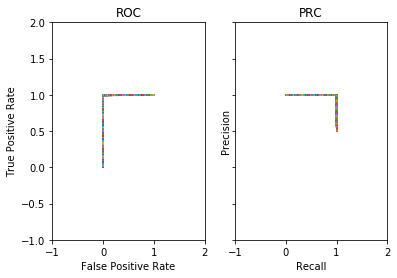

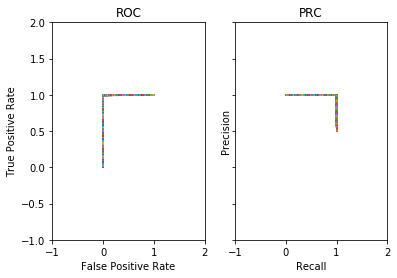

In [0]:
plot_roc_and_prc(tp, fp, tn, fn)

In [0]:
plt.plot(my_false_positive_rate, my_true_positive_rate)

# Here

In [0]:
len(ver_list[0])

2

In [0]:
islist = ver_list[0][1]
truth = 0
false = 0
for j in islist:
  if j == True:
    truth += 1
  else:
    false += 1

In [0]:
truth, false

(3000, 3000)